<a href="https://colab.research.google.com/github/kyileiaye2021/fire_risk_prediction/blob/main/Fire_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Fire Risk
According to temperature, wind speed, relative humanity, and rain, we are predicting there will be a risk of fire or not.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1gh-glHwMMVJmnwayP-1UxPoOM8RHJW4F?usp=sharing)


### Importing Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Mounting Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading Fire Risk Dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data Sets For Fire Risk App.xlsx - Sheet1.csv')

In [4]:
df.head()

,day,month,Temperature in Celsius,Wind Speed in kph,RH,Rain,Fire or Not Fire
0,1,6,30,60,68,0.0,not fire
1,2,6,31,79,43,0.0,fire
2,3,6,29,95,43,0.0,fire
3,4,6,32,83,78,0.0,fire
4,5,6,28,64,48,16.8,not fire


In [5]:
df.describe()

,day,month,Temperature in Celsius,Wind Speed in kph,RH,Rain
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,15.355731,7.245059,29.391304,81.600791,61.494071,1.460593
std,8.912267,1.674750,2.871771,13.024196,15.689856,3.200917
min,1.000000,1.000000,25.000000,60.000000,18.000000,0.000000
25%,8.000000,6.000000,27.000000,71.000000,51.000000,0.000000
50%,15.000000,7.000000,29.000000,81.000000,63.000000,0.100000
75%,23.000000,8.000000,32.000000,91.000000,74.000000,0.700000
max,31.000000,9.000000,34.000000,159.000000,90.000000,16.800000


### Data Preprocessing

In [6]:
# missing values
missing_values = df.isnull().sum()
print(missing_values)

day                       0
month                     0
Temperature in Celsius    0
Wind Speed in kph         0
RH                        0
Rain                      0
Fire or Not Fire          0
dtype: int64


In [7]:
# duplicates
duplicates = df.duplicated().sum()
print(duplicates)

0


In [10]:
# converting categorical value of target variable column to binary value

encoder = LabelEncoder()
df['Fire or Not Fire'] = encoder.fit_transform(df['Fire or Not Fire'])

df.head()

,day,month,Temperature in Celsius,Wind Speed in kph,RH,Rain,Fire or Not Fire
0,1,6,30,60,68,0.0,1
1,2,6,31,79,43,0.0,0
2,3,6,29,95,43,0.0,0
3,4,6,32,83,78,0.0,0
4,5,6,28,64,48,16.8,1


In [13]:
# checking correlation between features
correlation_matrix = df.corr()
correlation_target = correlation_matrix['Fire or Not Fire'].sort_values(ascending=False)
print(correlation_target)

Fire or Not Fire          1.000000
month                     0.281776
Rain                      0.154123
RH                        0.103818
day                       0.073705
Temperature in Celsius   -0.039892
Wind Speed in kph        -0.156766
Name: Fire or Not Fire, dtype: float64


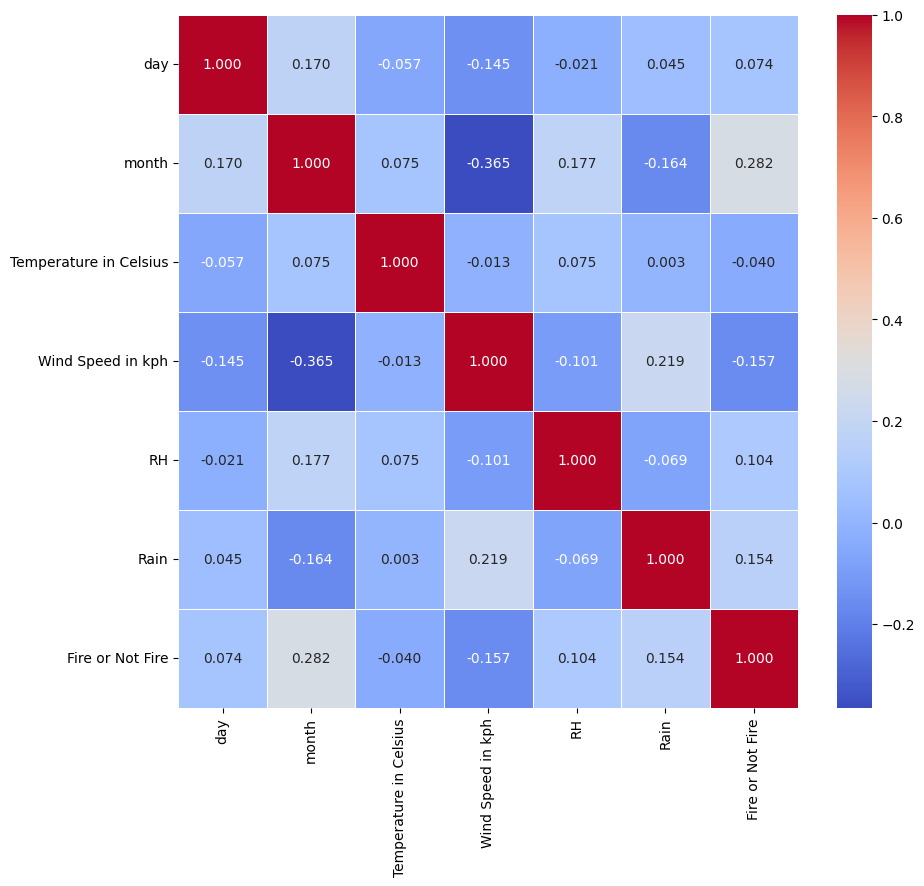

In [14]:
# Checking Multicollinearity
plt.figure(figsize=(10,9))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm', fmt='.3f', linewidth=0.6)
plt.show()

In [31]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
# Select continuous features to scale
features_to_scale = ['Temperature in Celsius', 'Wind Speed in kph', 'RH','Rain']
scaler = StandardScaler()

# Apply scaler to features
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

print(df_scaled.head())

   day  month  Temperature in Celsius  Wind Speed in kph        RH      Rain  \
0    1      6                0.212378          -1.661800  0.415480 -0.457209   
1    2      6                0.561286          -0.200085 -1.181064 -0.457209   
2    3      6               -0.136529           1.030833 -1.181064 -0.457209   
3    4      6                0.910193           0.107644  1.054098 -0.457209   
4    5      6               -0.485436          -1.354070 -0.861755  4.801690   

   Fire or Not Fire  
0                 1  
1                 0  
2                 0  
3                 0  
4                 1  


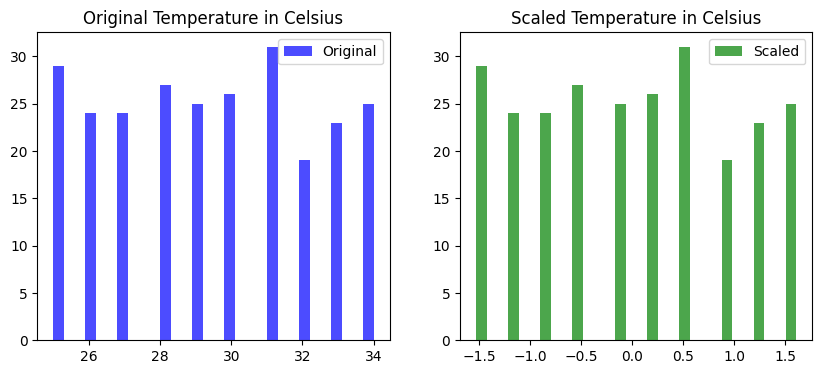

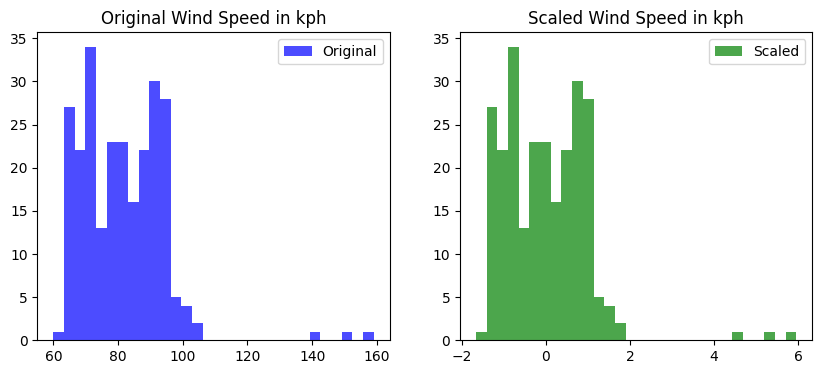

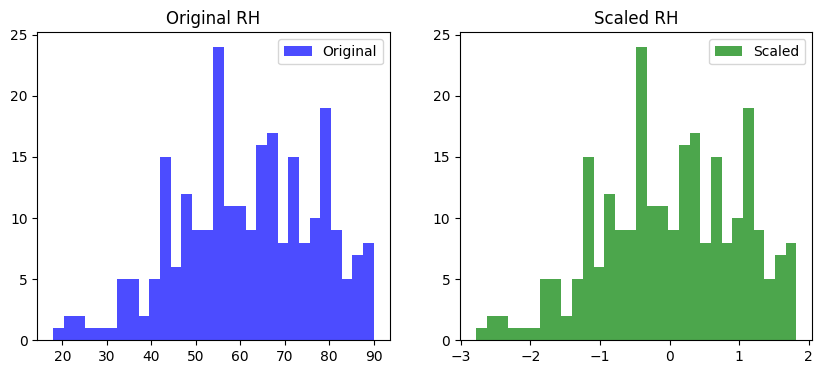

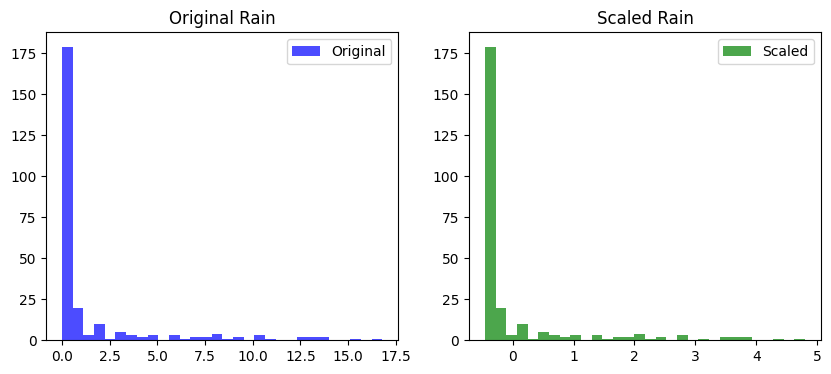

In [30]:
import matplotlib.pyplot as plt

# Visualize before and after scaling
for feature in features_to_scale:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(df[feature], bins=30, color='blue', alpha=0.7, label='Original')
    plt.title(f"Original {feature}")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.hist(df_scaled[feature], bins=30, color='green', alpha=0.7, label='Scaled')
    plt.title(f"Scaled {feature}")
    plt.legend()

    plt.show()

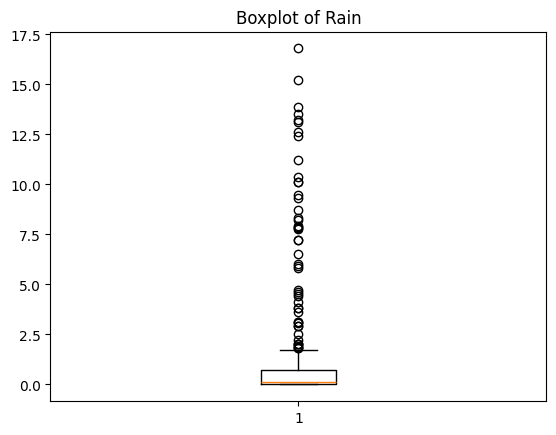

In [33]:
# feature scaling for rain is not within the range of -3 to 3
# the data in rain column are probably skewed

# visualizing rain column
import matplotlib.pyplot as plt
plt.boxplot(df['Rain'])
plt.title('Boxplot of Rain')
plt.show()


In [56]:
# Calculate the median and 95th percentile
rain_median = df['Rain'].median()
rain_95th = df['Rain'].quantile(0.95)

# Replace outliers above the 95th percentile with the median
df['Rain_replaced'] = df['Rain'].apply(lambda x: rain_median if x > rain_95th else x)

print(df[['Rain', 'Rain_replaced']].head())

,day,month,Temperature in Celsius,Wind Speed in kph,RH,Rain,Fire or Not Fire,Rain_log,Rain_scaled,Rain_capped,Rain_replaced,Rain_replaced_capped
0,1,6,30,60,68,0.0,1,0.00000,-0.607697,0.00,0.0,0.0
1,2,6,31,79,43,0.0,0,0.00000,-0.607697,0.00,0.0,0.0
2,3,6,29,95,43,0.0,0,0.00000,-0.607697,0.00,0.0,0.0
3,4,6,32,83,78,0.0,0,0.00000,-0.607697,0.00,0.0,0.0
4,5,6,28,64,48,16.8,1,0.09531,-0.437022,9.36,0.1,0.1


In [55]:
# what about scaling rain itself independently and then scaling with other features?

# Cap Rain at 95th percentile after replacing extreme values
rain_95th = df['Rain_replaced'].quantile(0.95)
df['Rain_replaced_capped'] = np.minimum(df['Rain_replaced'], rain_95th)

# Apply log transformation
df['Rain_log'] = np.log1p(df['Rain_replaced_capped']) # when data contains 0 or negative values

# Scale the modified Rain feature
rain_scaler = StandardScaler()
df['Rain_scaled'] = rain_scaler.fit_transform(df[['Rain_log']])

print(df[['Rain', 'Rain_replaced_capped', 'Rain_scaled']])


     Rain  Rain_replaced_capped  Rain_scaled
0     0.0                 0.000    -0.607697
1     0.0                 0.000    -0.607697
2     0.0                 0.000    -0.607697
3     0.0                 0.000    -0.607697
4    16.8                 0.100    -0.437022
..    ...                   ...          ...
248  13.2                 0.100    -0.437022
249  11.2                 0.100    -0.437022
250  10.1                 0.100    -0.437022
251   9.3                 5.848     2.837601
252   0.2                 0.200    -0.281207

[253 rows x 3 columns]


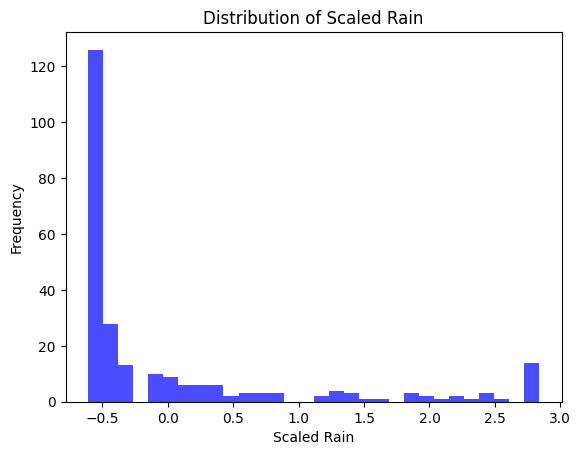

In [54]:
import matplotlib.pyplot as plt

# Histogram of scaled Rain
plt.hist(df['Rain_scaled'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Scaled Rain')
plt.xlabel('Scaled Rain')
plt.ylabel('Frequency')
plt.show()


In [60]:
# Rescale other features in the dataset
from sklearn.preprocessing import StandardScaler
# Select continuous features to scale
features_to_scale = ['Temperature in Celsius', 'Wind Speed in kph', 'RH']
scaler = StandardScaler()

# Apply scaler to features
columns_to_keep = ['Temperature in Celsius', 'Wind Speed in kph', 'RH', 'Rain_scaled', 'Fire or Not Fire']
df_scaled = df[columns_to_keep]
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

print(df_scaled.head())

   Temperature in Celsius  Wind Speed in kph        RH  Rain_scaled  \
0                0.212378          -1.661800  0.415480    -0.607697   
1                0.561286          -0.200085 -1.181064    -0.607697   
2               -0.136529           1.030833 -1.181064    -0.607697   
3                0.910193           0.107644  1.054098    -0.607697   
4               -0.485436          -1.354070 -0.861755    -0.437022   

   Fire or Not Fire  
0                 1  
1                 0  
2                 0  
3                 0  
4                 1  


<ipython-input-60-b9e8d667c309>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])


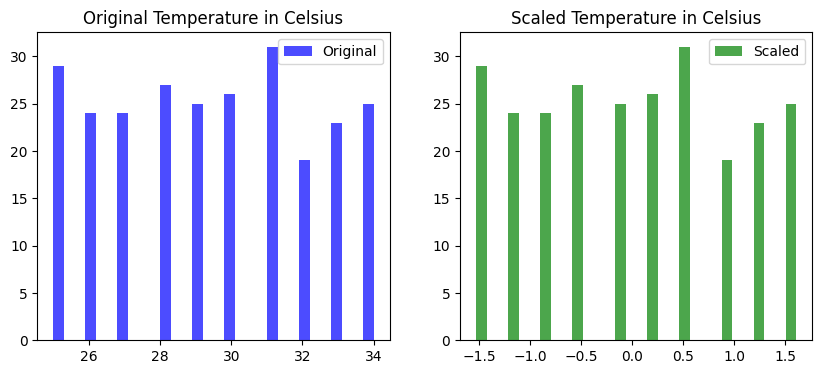

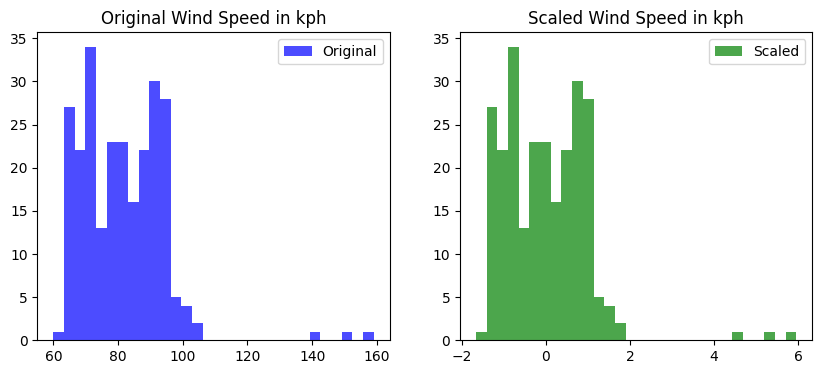

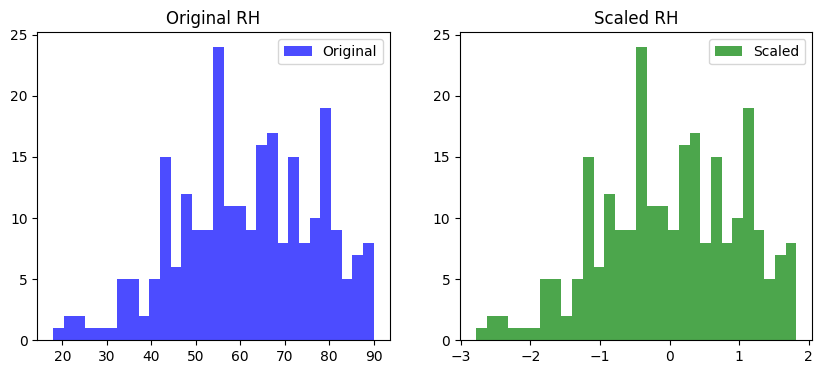

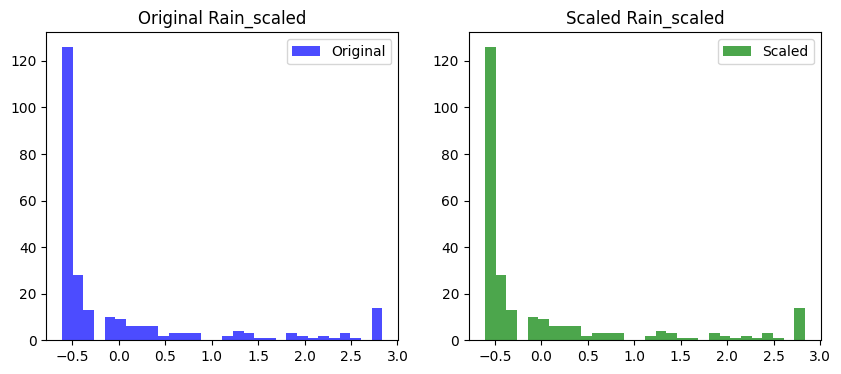

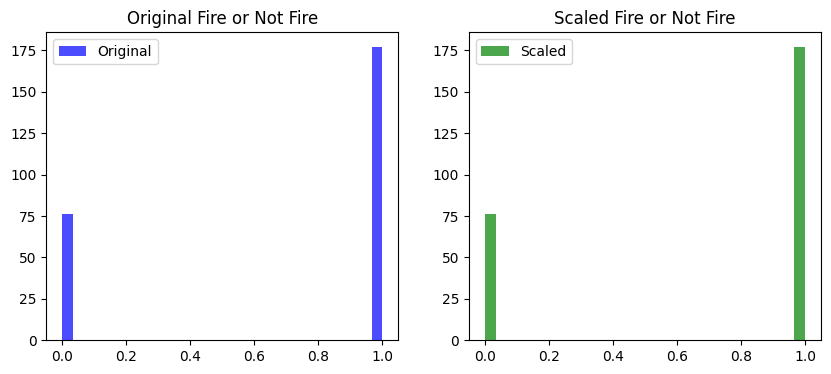

In [61]:
import matplotlib.pyplot as plt

# Visualize before and after scaling
for col in columns_to_keep:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=30, color='blue', alpha=0.7, label='Original')
    plt.title(f"Original {col}")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.hist(df_scaled[col], bins=30, color='green', alpha=0.7, label='Scaled')
    plt.title(f"Scaled {col}")
    plt.legend()

    plt.show()

### Logistic Classification Model

In [62]:
# preparing data
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df[['Rain_scaled', 'Temperature in Celsius', 'Wind Speed in kph', 'RH']]
y = df['Fire or Not Fire']

# splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(202, 4) (51, 4)


In [65]:
# fit and evaluate the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print()

classification_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{classification_report}")
print()

confusion_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{confusion_matrix}")

Accuracy: 0.65

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.14      0.18        14
           1       0.72      0.84      0.78        37

    accuracy                           0.65        51
   macro avg       0.49      0.49      0.48        51
weighted avg       0.59      0.65      0.61        51


Confusion Matrix:
[[ 2 12]
 [ 6 31]]


### Optimization of the model

In [66]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define model and parameter grid
rf = RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20]}

# Grid search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train) # train the model during cross-validation to find the best parameters

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 5, 'n_estimators': 200}


In [67]:
# Refit the model on the entire training set with the best parameters
best_params = grid_search.best_params_
best_rf_model = RandomForestClassifier(**best_params)

# Train the model on the full training set
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200)

In [73]:
# Evaluation of the optimized model
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

y_pred = best_rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm, "\n")

# Classification Report
report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")

Accuracy: 0.84

Confusion Matrix:
 [[ 9  5]
 [ 3 34]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        14
           1       0.87      0.92      0.89        37

    accuracy                           0.84        51
   macro avg       0.81      0.78      0.79        51
weighted avg       0.84      0.84      0.84        51



After optimization, model can correctly predict 84% of all cases.